In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
def spec(path, sample):
    pal = 'viridis'
    col = ["Frequency (Hz)", "Z'", "-Z''", "Fit Frequency (Hz)", "Fit Z'", "Fit -Z''" ]
    files = [os.path.join(path, i) for i in os.listdir(path) if 'spectra' in i] # Check file name
    spectra = pd.DataFrame()
    n = 0
    for i in files:   
        df_s = pd.read_csv(i, skiprows=4, sep = '\t', names=col)

        df_s[col[2]] = -df_s[col[2]]
        df_s[col[5]] = -df_s[col[5]]
        df_s['Run'] = n
        spectra = pd.concat([spectra, df_s], ignore_index=True)
        n += 1

    fig, ax = plt.subplots(dpi = 200)
    sns.scatterplot(data = spectra, x = col[1], y = col[2], legend = False, hue = 'Run', palette=pal)
    sns.lineplot(data = spectra, x = col[4], y = col[5],  hue = 'Run', legend = False, palette=pal)
    plt.title(sample)
    
    return spectra

def data_fit(path, sample):
    spectra = [os.path.join(path, i) for i in os.listdir(path) if 'Spectra' in i]
    fit = [os.path.join(path, i) for i in os.listdir(path) if 'Fit' in i]
    col = ["Frequency Hz",	"Z' ($\Omega$)",	"-Z'' ($\Omega$)",	"Fit Frequency (Hz)",	"Fit Z' ($\Omega$)",	"Fit -Z'' ($\Omega$)"]
    df = pd.read_csv(spectra[0], sep = '\t', skiprows = 4, names = col)
    df[col[2]] = -df[col[2]]
    df[col[5]] = -df[col[5]]
    fig, ax = plt.subplots(dpi = 100)
    sns.scatterplot(data = df, x =col[1], y = col[2])
    sns.lineplot(data = df, x = col[4], y = col[5])
    
    fit_values = pd.read_csv(fit[0], sep = '\t', skiprows = 2) 
    return df, fit_values

def data_fit_list(path, sample):
    spectra = [os.path.join(path, i) for i in os.listdir(path) if 'Spectra' in i]
    fit = [os.path.join(path, i) for i in os.listdir(path) if 'Fit' in i]
    col = ["Frequency Hz",	"Z' ($\Omega$)",	"-Z'' ($\Omega$)",	"Fit Frequency (Hz)",	"Fit Z' ($\Omega$)",	"Fit -Z'' ($\Omega$)"]
    all_spectra = pd.DataFrame()
    sample_name = ['a', 'b', 'c']
    
    n = 0
    for i in spectra:
        df = pd.read_csv(i, sep = '\t', skiprows = 4, names = col)
        df[col[2]] = -df[col[2]]
        df[col[5]] = -df[col[5]]
        df['Sample name'] = sample_name[n]
        all_spectra = pd.concat([all_spectra, df], ignore_index = True)
        
        n += 1
    fig, ax = plt.subplots(dpi = 100)
    sns.scatterplot(data = all_spectra, x =col[1], y = col[2], hue = 'Sample name')
    sns.lineplot(data = all_spectra, x = col[4], y = col[5], hue = 'Sample name')
        
    fit_values = pd.read_csv(fit[0], sep = '\t', skiprows = 2)
    fit_values['Sample name'] = sample_name
    return all_spectra, fit_values

0    3.855069e-08
Name: Resistance 1: value, dtype: float64

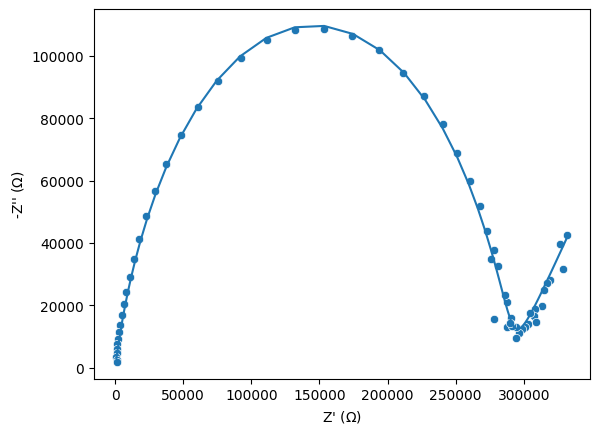

In [71]:
sample = 'Li TFSI:BMP TFSI  2:1'
thickness = 0.035 # cm
area = np.pi * 1**2 # cm2
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Impedance\Solid Electrolyte\Comeback\BMP LiTFSI\1_2\Good signal'
fit, values = data_fit(path, sample)
electrolyte_r = values['Resistance 1: value']
conductivity = thickness / (electrolyte_r *area)  #thickness/area*resistance
conductivity

8.78e-06
9.46e-06
8.42e-06


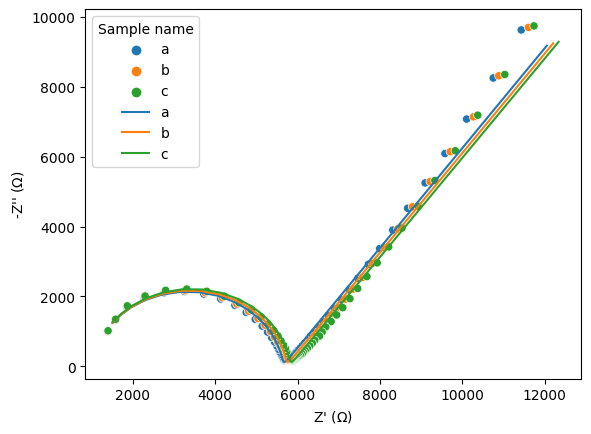

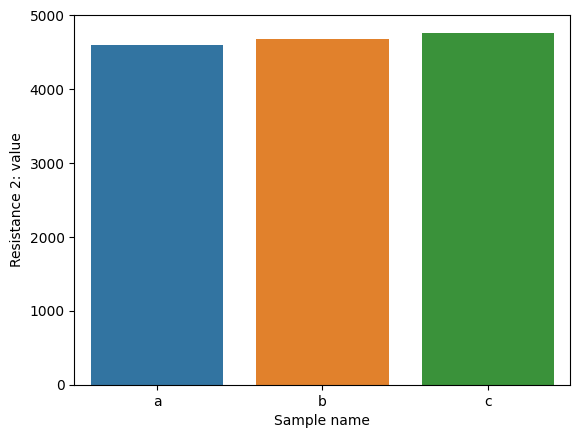

In [80]:
sample = 'Li TFSI:EMI TFSI  2:1'
thickness = [0.127, 0.139, 0.126] #cm

area = np.pi * 1**2 # cm2
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Masters\Jonas\Day3\Day3'
fit, values = data_fit_list(path, sample)
fig, ax = plt.subplots(dpi = 100)
sns.barplot(data = values, x = 'Sample name', y = 'Resistance 2: value')

electrolyte_r = values['Resistance 2: value']
conductivity = thickness / (electrolyte_r *area)  #thickness/area*resistance
for i in conductivity:
    print('{:.2e}'.format(i))